In [4]:
import matplotlib.pyplot as plt
import os
import pandas as pd

CARD_FACTORY_DATA_DIR = os.path.join(os.environ.get('APPDATA'), 'Godot', 'app_userdata', 'Card Factory', 'data')
TOTAL_CARD_INFO_PATH = os.path.join(CARD_FACTORY_DATA_DIR, 'CardPoolAnalysis_TotalCardInfo.csv')
CARD_INFO_HIST_PATH = os.path.join(CARD_FACTORY_DATA_DIR, 'CardPoolAnalysis_CardInfoHist.csv')
ADJ_HIST_PATH = os.path.join(CARD_FACTORY_DATA_DIR, 'CardPoolAnalysis_AdjHist.csv')
NOUN_HIST_PATH = os.path.join(CARD_FACTORY_DATA_DIR, 'CardPoolAnalysis_NounHist.csv')
NAME_HIST_PATH = os.path.join(CARD_FACTORY_DATA_DIR, 'CardPoolAnalysis_NameHist.csv')

# Generated Card Overview

Visualization of card distributions

Color Key:
   0: darkgray
   1: royalblue
   2: green
   MORE: purple


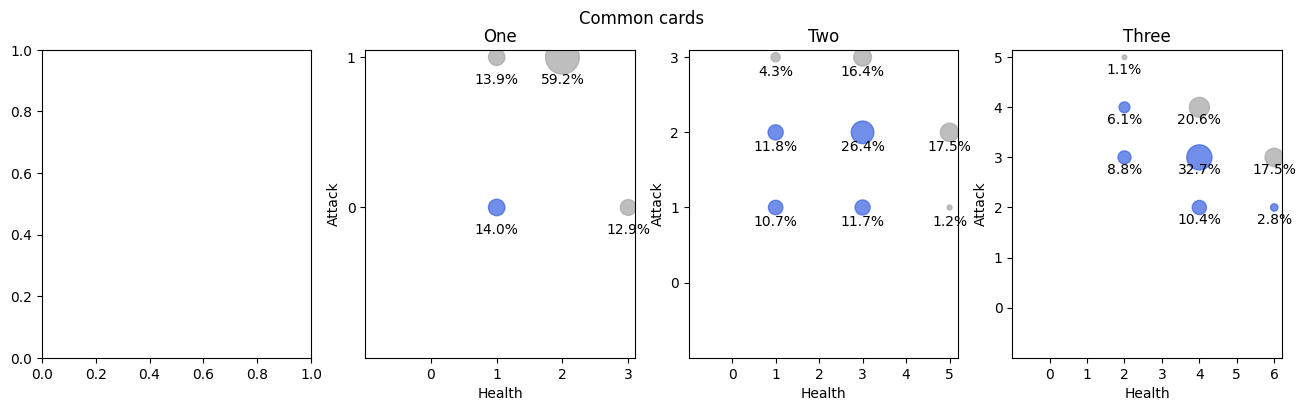

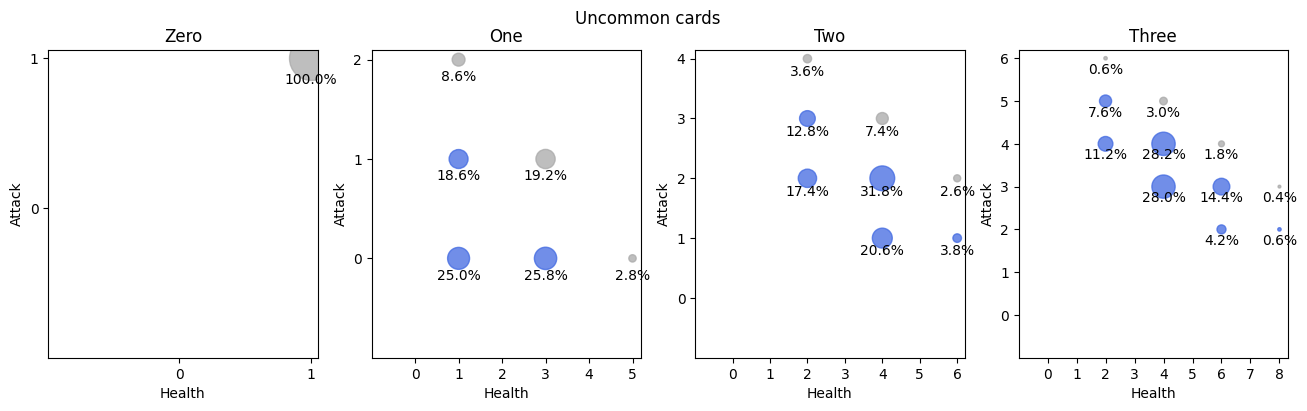

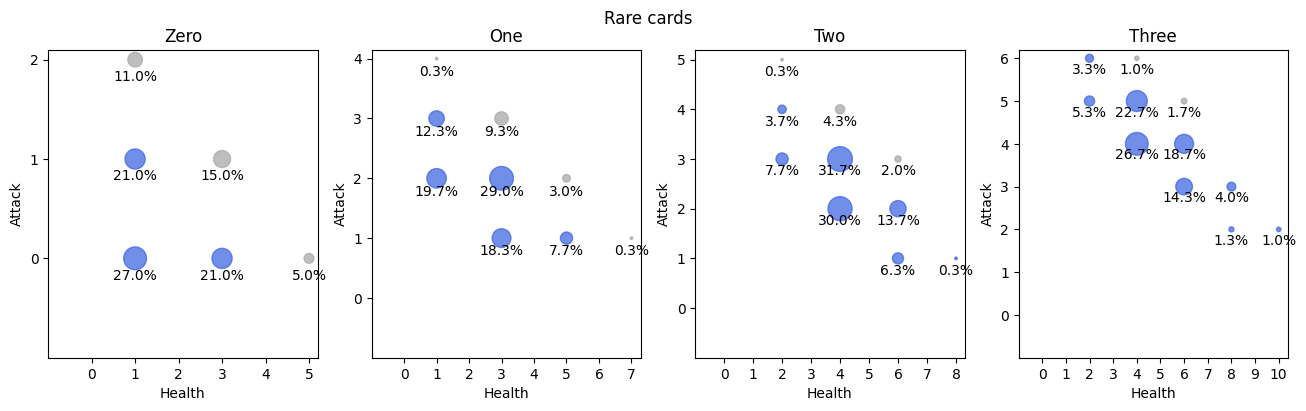

In [53]:
df = pd.read_csv(TOTAL_CARD_INFO_PATH, skipinitialspace=True)

color_map = { 0: 'darkgray', 1: 'royalblue', 2: 'green' }
extra_color = 'purple'
print('Color Key:')
for key, value in color_map.items():
    print(f"   {key}: {value}")
print(f"   MORE: {extra_color}")

for rarity in ['Common', 'Uncommon', 'Rare']:
    df_ability = df[df['Rarity'] == rarity]
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))

    for i, cost in enumerate(['Zero', 'One', 'Two', 'Three']):
        df_cost_ability = df_ability[df_ability['BloodCost'] == cost] \
            .groupby((['Health', 'Attack'])) \
            .agg({ 'AbilitiesCount': 'sum', 'Count': 'sum' }).reset_index()
        
        if (df_cost_ability.empty):
            continue # some combinations may have no cards

        x = df_cost_ability['Health']
        y = df_cost_ability['Attack']

        abilities = df_cost_ability['AbilitiesCount']
        bubble_colors = abilities.apply(lambda x: color_map.get(x, extra_color))
    
        count = df_cost_ability['Count']
        total_count = count.sum()
        normalized_count = count / total_count * 100.0
        normalized_size = count / total_count * 1000.0
        
        axs[i].scatter(x, y, s=normalized_size, alpha=0.75, color=bubble_colors)
        for j in range(len(df_cost_ability)):
            # axs[i].text(x.iloc[j], y.iloc[j] + 0.1, f"{count.iloc[j]}", ha='center', va='bottom', fontsize=10)
            axs[i].text(x.iloc[j], y.iloc[j] - 0.1, f"{round(normalized_count.iloc[j], 1)}%", ha='center', va='top', fontsize=10)
        axs[i].set_title(cost)
        axs[i].set_xlabel('Health')
        axs[i].set_ylabel('Attack')
        axs[i].set_xlim(left = -1)
        axs[i].set_xticks(range(0, x.max() + 1))
        axs[i].set_ylim(bottom = -1)
        axs[i].set_yticks(range(0, y.max() + 1))
    plt.suptitle(f"{rarity} cards")
    plt.show()

      Rarity BloodCost  Attack  Health  AbilitiesCount Abilities  Count
0  Sacrifice      Zero       0       1               0      None    800
1   Uncommon      Zero       1       1               0      None    300
2       Rare      Zero       0       1               1     Agile     27
3       Rare      Zero       0       3               1     Guard     21
4       Rare      Zero       0       5               0      None      5
Color Key:
   Common: tan
   Uncommon: royalblue
   Rare: gold
None
       Rarity BloodCost  Attack  Health  AbilitiesCount Abilities  Count
0   Sacrifice      Zero       0       1               0      None    800
1    Uncommon      Zero       1       1               0      None    300
4        Rare      Zero       0       5               0      None      5
6        Rare      Zero       1       3               0      None     15
7        Rare      Zero       2       1               0      None     11
9      Common       One       0       3               0      N

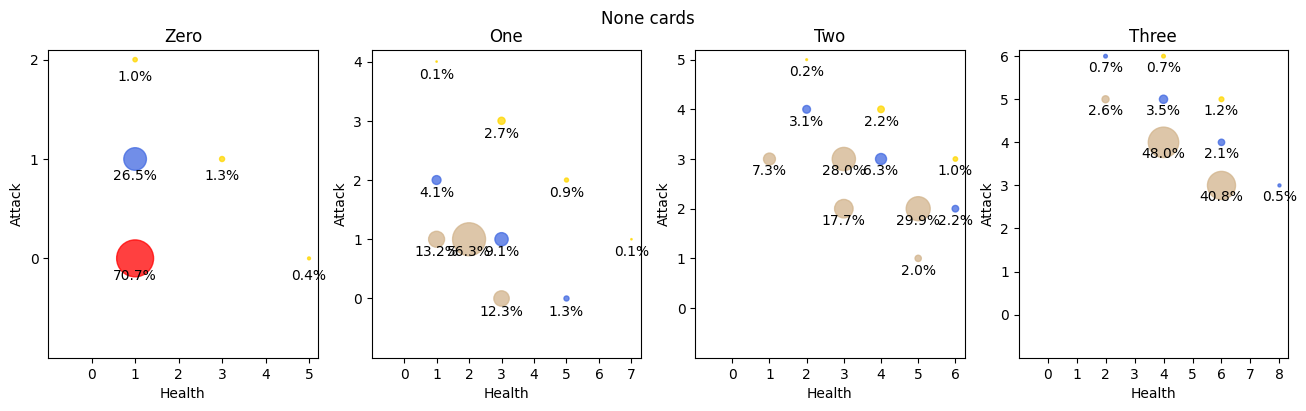

Agile
      Rarity BloodCost  Attack  Health  AbilitiesCount Abilities  Count
2       Rare      Zero       0       1               1     Agile     27
12  Uncommon       One       0       1               1     Agile    125
18      Rare       One       1       3               1     Agile     55
21      Rare       One       2       1               1     Agile     59
27    Common       Two       1       1               1     Agile    107
36  Uncommon       Two       1       4               1     Agile    103
38  Uncommon       Two       2       2               1     Agile     87
44      Rare       Two       1       6               1     Agile     19
46      Rare       Two       2       4               1     Agile     90
48      Rare       Two       3       2               1     Agile     23
54    Common     Three       2       4               1     Agile    104
56    Common     Three       3       2               1     Agile     88
62  Uncommon     Three       2       6               1    

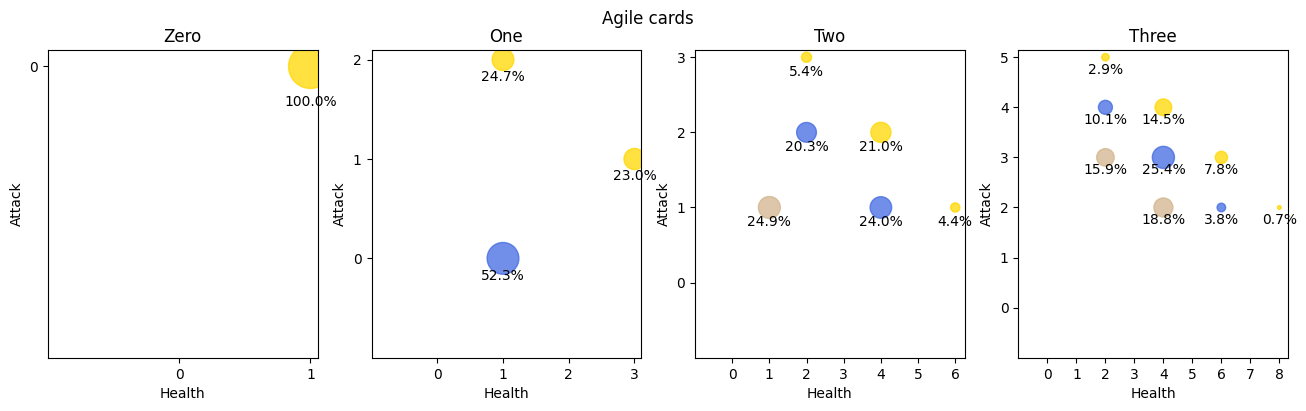

Guard
      Rarity BloodCost  Attack  Health  AbilitiesCount Abilities  Count
3       Rare      Zero       0       3               1     Guard     21
5       Rare      Zero       1       1               1     Guard     21
8     Common       One       0       1               1     Guard    140
13  Uncommon       One       0       3               1     Guard    129
15  Uncommon       One       1       1               1     Guard     93
19      Rare       One       1       5               1     Guard     23
22      Rare       One       2       3               1     Guard     87
24      Rare       One       3       1               1     Guard     37
28    Common       Two       1       3               1     Guard    117
30    Common       Two       2       1               1     Guard    118
32    Common       Two       2       3               1     Guard    160
37  Uncommon       Two       1       6               1     Guard     19
39  Uncommon       Two       2       4               1    

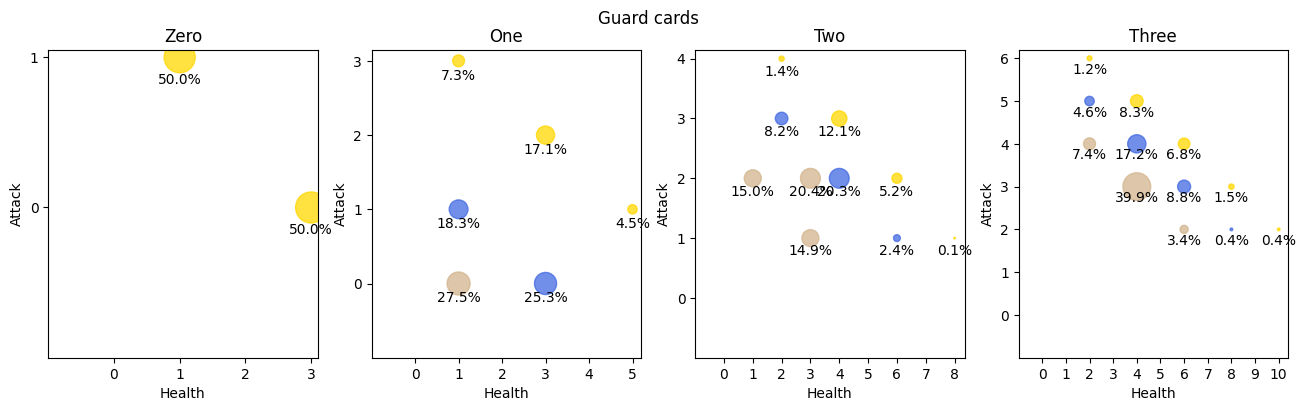

In [59]:
df = pd.read_csv(TOTAL_CARD_INFO_PATH, skipinitialspace=True, keep_default_na=False)

color_map = { 'Common': 'tan', 'Uncommon': 'royalblue', 'Rare': 'gold' }
print('Color Key:')
for key, value in color_map.items():
    print(f"   {key}: {value}")

for ability in df['Abilities'].unique():
    df_ability = df[df['Abilities'] == ability]
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))

    for i, cost in enumerate(['Zero', 'One', 'Two', 'Three']):
        df_cost_ability = df_ability[df_ability['BloodCost'] == cost]
        if (df_cost_ability.empty):
            continue # some combinations may have no cards

        x = df_cost_ability['Health']
        y = df_cost_ability['Attack']

        rarities = df_cost_ability['Rarity']
        bubble_colors = rarities.apply(lambda x: color_map.get(x, 'red'))
    
        count = df_cost_ability['Count']
        total_count = count.sum()
        normalized_count = count / total_count * 100.0
        normalized_size = count / total_count * 1000.0
        
        axs[i].scatter(x, y, s=normalized_size, alpha=0.75, color=bubble_colors)
        for j in range(len(df_cost_ability)):
            # axs[i].text(x.iloc[j], y.iloc[j] + 0.1, f"{count.iloc[j]}", ha='center', va='bottom', fontsize=10)
            axs[i].text(x.iloc[j], y.iloc[j] - 0.1, f"{round(normalized_count.iloc[j], 1)}%", ha='center', va='top', fontsize=10)
        axs[i].set_title(cost)
        axs[i].set_xlabel('Health')
        axs[i].set_ylabel('Attack')
        axs[i].set_xlim(left = -1)
        axs[i].set_xticks(range(0, x.max() + 1))
        axs[i].set_ylim(bottom = -1)
        axs[i].set_yticks(range(0, y.max() + 1))
    plt.suptitle(f"{ability} cards")
    plt.show()

# Generated Card Collisions
How often do cards in the same generated pool have the same name or the same stats?

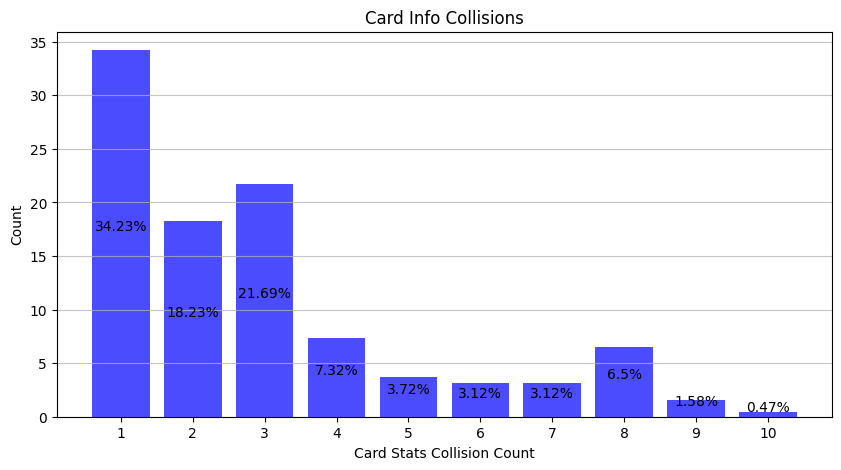

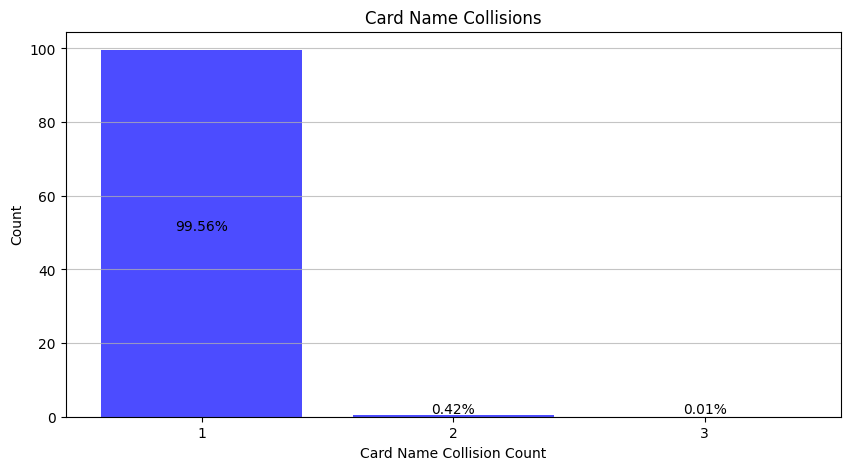

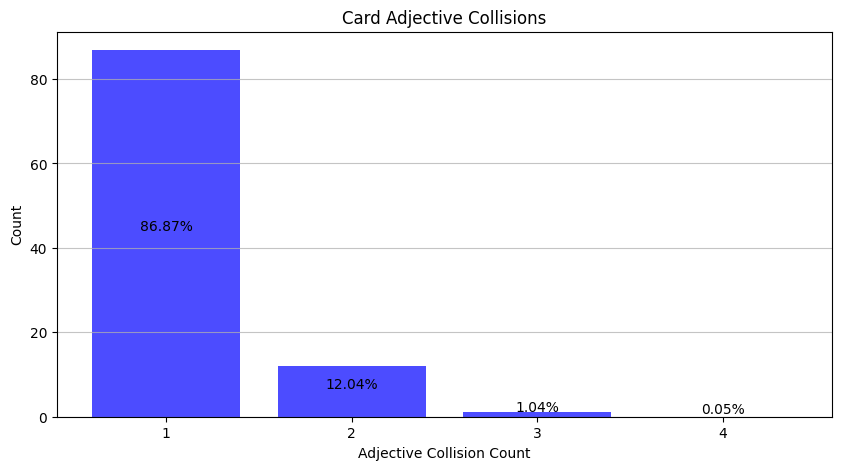

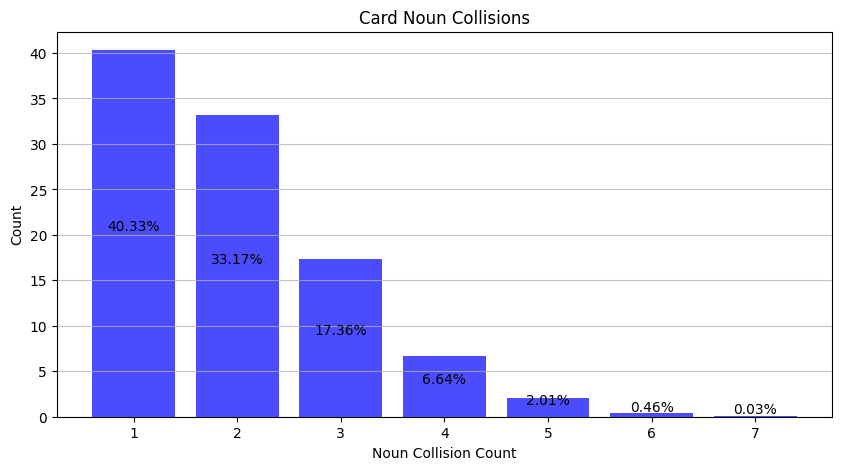

In [29]:
def plot_histogram(csv_path, histogram_name):
    df = pd.read_csv(csv_path, skipinitialspace=True)

    column_names = df.columns
    bucket_column = df[column_names[0]]
    count_column = df[column_names[1]]
    total_count = count_column.sum()
    percentage_column = (count_column / total_count) * 100.0

    plt.figure(figsize=(10, 5))
    barchart = plt.bar(bucket_column, percentage_column, color='blue', alpha=0.7) 
    plt.title(histogram_name)
    plt.xlabel(column_names[0])
    plt.xticks(bucket_column)
    plt.ylabel(column_names[1])
    plt.grid(axis='y', alpha=0.75)
    for bar in barchart:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f"{round(bar.get_height(), 2)}%", ha='center', va='bottom')

    plt.show()

plot_histogram(CARD_INFO_HIST_PATH, 'Card Info Collisions')
plot_histogram(NAME_HIST_PATH, 'Card Name Collisions')
plot_histogram(ADJ_HIST_PATH, 'Card Adjective Collisions')
plot_histogram(NOUN_HIST_PATH, 'Card Noun Collisions')